In [18]:
import os
os.environ["JAX_PLATFORMS"] = "cpu"  # Ensure JAX uses CPU backend
os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=100"

import matplotlib.pyplot as plt
import numpy as np
from skopt.space import Space
from skopt.sampler import Halton
import jax.numpy as jnp
import Plot_Files.With_Energy_prk_method_for_plots as WithE_plots
import Plot_Files.Without_Energy_prk_method_for_plots as WithoutE_plots

"""
############################ Creating Halton sequence #####################################
"""
spacedim = [(-0.05, 0.05)] * 6
space = Space(spacedim)
halton = Halton()
n = 1

halton_sequence = halton.generate(space, n)
halton_sequence = jnp.array(halton_sequence)
# halton_sequence = halton_sequence[3:4]


# print(halton_currently_using, len(halton_currently_using))
"""
############################### Conversion Function ########################################
"""
def Convert_toOneD(A1, A2, B1, B2):
    A1D = One_Dim_Matrix(A1)
    A1D = Add_B_tomatrix_A(A1D, B1)
    A2D = One_Dim_Matrix(A2)
    A2D = Add_B_tomatrix_A(A2D, B2)
    A1D = Add_B_tomatrix_A(A1D, A2D)
    
    return A1D

def One_Dim_Matrix(A):
    """
    We use this function to convert a 2D array into a 1D array containing only the lower triangular matrix of the 2D array.
    : param A : a 2D array
    : return : a 1D array

    """
    dim_x, dim_y = A.shape
    #print(dim_x, dim_y)
    A = A.reshape(1, (dim_x * dim_y))
    return A


def Add_B_tomatrix_A(A, b):
    """
    Given 2 1D arrays this function appends the second array at the end of first array.
    : param A : 1D array
    : param b : 1D array
    : return : 1D array after appending array b to A

    """
    A = jnp.append(A,b)
    return A
"""
############################### Initial Weights ###############################
"""

# Initial weights 
## Lobatto 3A and 
A1 = jnp.array([
     [0., 0., 0., 0.],
     [5/24, 1/3, -1/24, 0.],
     [1/6, 2/3, 1/6, 0.],
     [0., 0., 0., 0.]])
B1 = jnp.array([1/6, 2/3, 1/6, 0.])

## Lobatto 3B
A2 = jnp.array([
     [1/6, -1/6, 0., 0.],
     [1/6, 1/3, 0, 0.],
     [1/6, 5/6, 0, 0.],
     [0., 0., 0., 0.]])
B2 = jnp.array([1/6, 2/3, 1/6, 0.])
################################################
PA1 = jnp.array([
     [0.5, 0., 0., 0.],
     [5/24, 2/3, -3/24, 0.],
     [1/6, 2/3, 1/6, 0.5],
     [0., 0., 0.5, 0.]])
PB1 = jnp.array([2/6, 1/3, 1/6, 0.])
    
PA2 = jnp.array([
     [1/6, -1/6, 0., 0.],
     [1/6, 1/3, 0, 0.],
     [1/6, 5/6, 0, 0.],
     [0., 0., 0., 0.]])
PB2 = jnp.array([1/6, 2/3, 1/6, 0.])

"""
#################### Converting initial weights to 1D array ####################
"""

# Converting to 1D array A1D
A1D_original_BeforeOptimization = Convert_toOneD(A1, A2, B1, B2)
A1D_Perturbed_BeforeOptimization = Convert_toOneD(PA1, PA2, PB1, PB2)

"""
######################## Loading the optimized weights ########################
"""

### With Energy
WithE_final_A1D_Lobatto = np.loadtxt('With_Energy/One-batch-Lobatto-Outputs/Final_weights.txt')
WithE_final_A1D_Lobatto_Perturbed = np.loadtxt('With_Energy/One-batch-PerturbedLobatto-Outputs/Final_weights.txt')

### Without Energy
WithoutE_final_A1D_Lobatto = np.loadtxt('Without_Energy/One-batch-Lobatto-Outputs/Final_weights.txt')
WithoutE_final_A1D_Lobatto_Perturbed = np.loadtxt('Without_Energy/One-batch-PerturbedLobatto-Outputs/Final_weights.txt')

     

In [19]:
# Function to adjust x-ticks for correct time steps
def set_xticks_to_actual_steps(ax, actual_steps):
    # Set ticks to represent actual time steps
    ax.set_xticks(np.arange(0, actual_steps + 1, 1))
    ax.grid(True)

# Actual number of time steps (e.g., 0 to 10)
actual_steps = 10
# Total number of points per time step (e.g., 100 points per step)
points_per_step = 100


# Original Lobatto as initial weights

In [20]:
# Data sources for the different conditions
conditions = [
    ("Before Optimization", A1D_original_BeforeOptimization, WithE_plots),
    ("After Optimization with Energy Error", WithE_final_A1D_Lobatto, WithE_plots),
    ("After Optimization without Energy Error", WithoutE_final_A1D_Lobatto, WithoutE_plots)
    
]
Plot_name = "Original Lobatto 3A-3B Dynamics Before and After Optimization"
font_size = 12

In [21]:
# ## DELETE this, this is to check for animation : if the annimation works, utilize it in the presentation

# ## Animation plotting :

# from matplotlib.animation import FuncAnimation

# # Example: Simulated error data
# epochs = 100  # Number of epochs
# errors = np.loadtxt('With_Energy/One-batch-Lobatto-Outputs/Error.txt')

# # Create a figure and axis for the plot
# fig, ax = plt.subplots()
# ax.set_xlim(0, epochs)
# ax.set_ylim(0, max(errors) + 1e-5)  # Adjusting y-axis to your desired scale (10^-13)

# # Plot initialization
# line, = ax.plot([], [], lw=2)
# ax.set_title('Error Convergence')
# ax.set_xlabel('Epoch')
# ax.set_ylabel('Error')

# # Initialize the plot (empty data)
# def init():
#     line.set_data([], [])
#     return line,

# # Update the plot for each frame in the animation
# def update(frame):
#     x_data = np.arange(0, frame + 1)
#     y_data = errors[:frame + 1]
#     line.set_data(x_data, y_data)
#     return line,

# # Create the animation
# ani = FuncAnimation(fig, update, frames=epochs, init_func=init, blit=True)

# # Save the animation as a GIF or MP4
# ani.save('error_convergence.gif', writer='pillow')

# # Show the plot (optional)
# plt.show()


### ** Dynamics Plot : p(t) - t  and  q(t) - t **

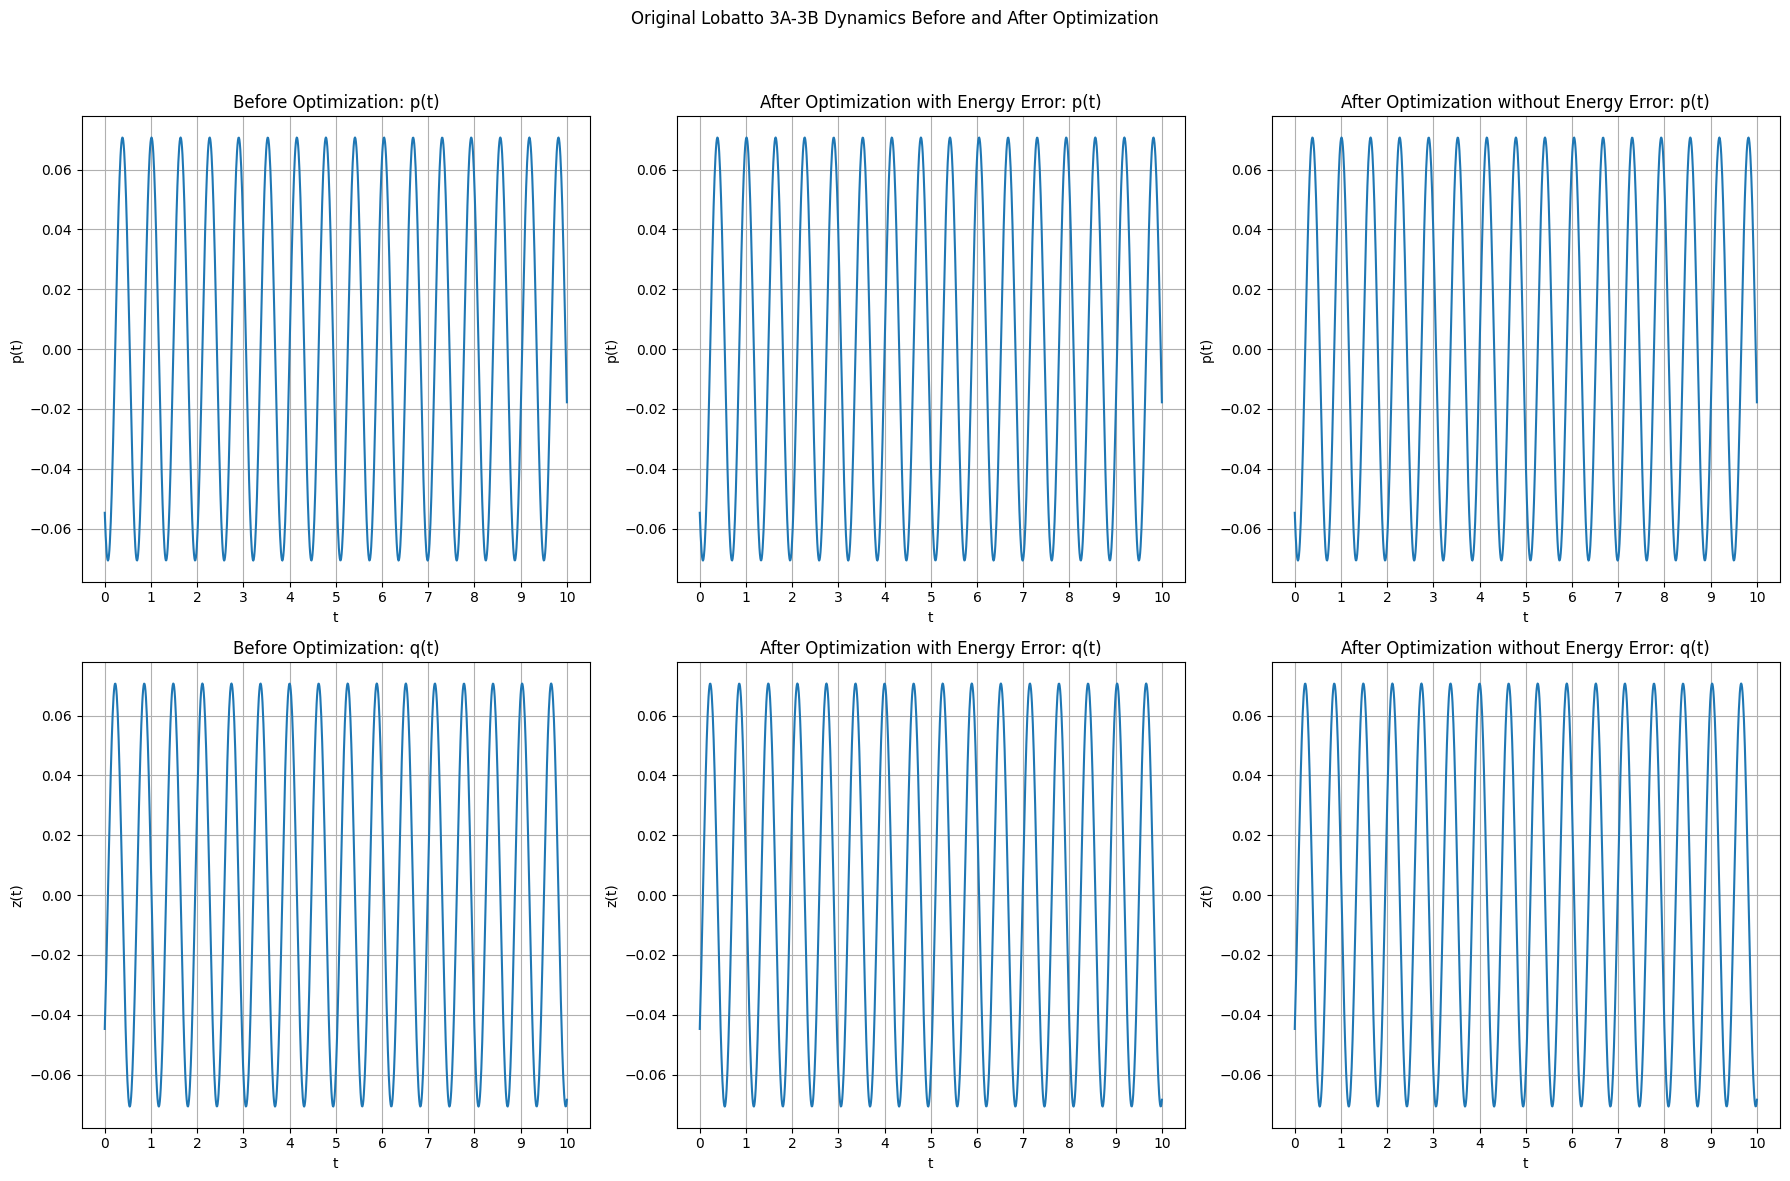

In [22]:
import numpy as np
import matplotlib.pyplot as plt


# Initialize the figure with 2 rows and 3 columns for the plots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(Plot_name, fontsize=font_size)

# Actual number of time steps (e.g., 0 to 10)
actual_steps = 10
# Total number of points per time step (e.g., 100 points per step)
points_per_step = 100

# Loop over the three conditions and the two rows (yn_list and zn_list)
for col_idx, (title, A1D_data, plots_module) in enumerate(conditions):
    for i, halton_currently_using in enumerate(halton_sequence):
        # Get error, energy, yn_list, zn_list, and H_t from the respective plot module
        Error, Energy, yn_list, zn_list, H_t = plots_module.find_error(A1D_data, halton_currently_using)

        # Create time values corresponding to actual steps (1 time step for every 100 points)
        t = np.linspace(0, actual_steps, len(yn_list))

        # Plot p(t) (yn_list) on the first row
        axs[0, col_idx].plot(t, yn_list, label=f"Sample {i+1}")

        # Plot z(t) (zn_list) on the second row
        axs[1, col_idx].plot(t, zn_list, label=f"Sample {i+1}")

    # Formatting for the first row (p(t) plots)
    axs[0, col_idx].set_xlabel('t')
    axs[0, col_idx].set_ylabel('p(t)')
    axs[0, col_idx].set_title(f"{title}: p(t)")
    set_xticks_to_actual_steps(axs[0, col_idx], actual_steps)  # Adjust x-ticks

    # Formatting for the second row (z(t) plots)
    axs[1, col_idx].set_xlabel('t')
    axs[1, col_idx].set_ylabel('z(t)')
    axs[1, col_idx].set_title(f"{title}: q(t)")
    set_xticks_to_actual_steps(axs[1, col_idx], actual_steps)  # Adjust x-ticks

# Final adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the super title

plt.show()


### ** Phase Plots : p(t) - q(t) **

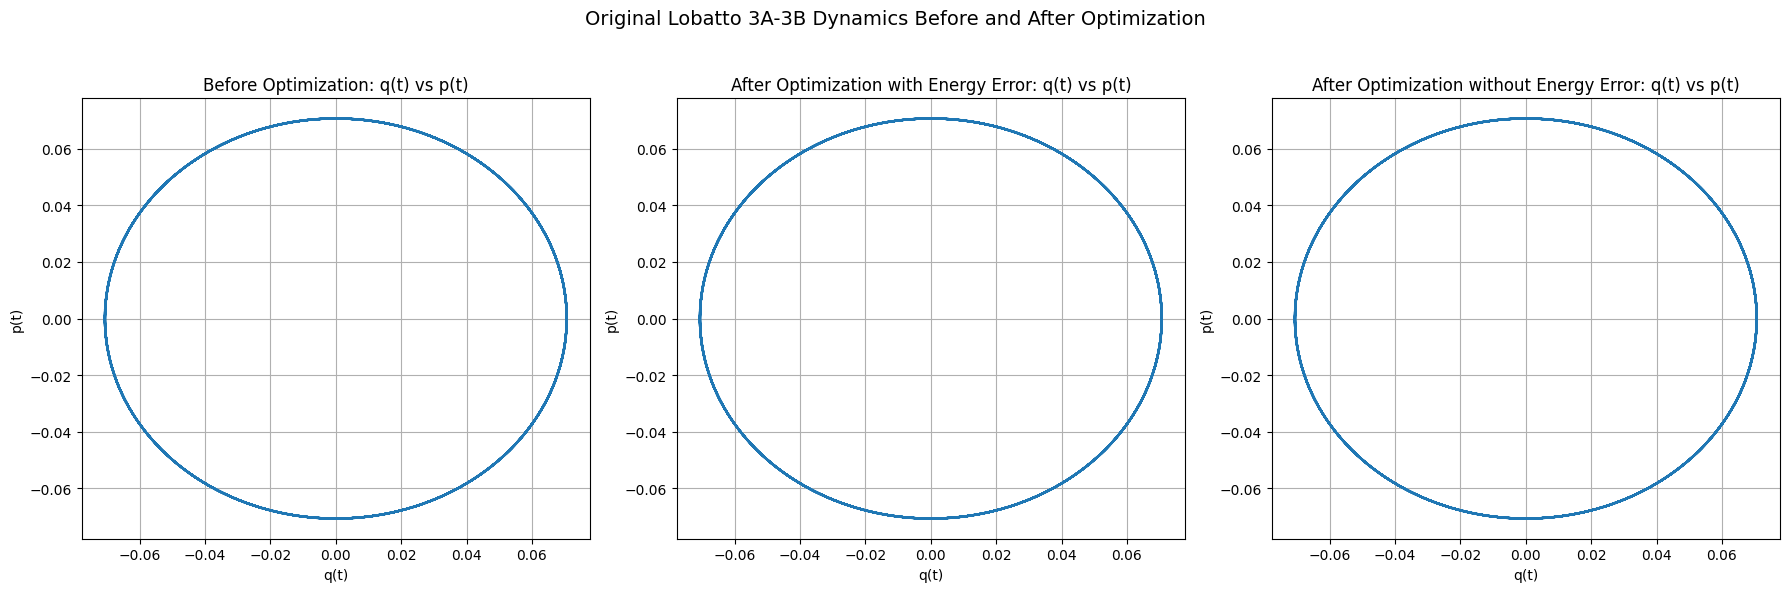

In [23]:
# Initialize the figure with 1 row and 3 columns for the plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Original Lobatto 3A-3B Dynamics Before and After Optimization", fontsize=14)

# Loop over the three conditions (only one row needed)
for col_idx, (title, A1D_data, plots_module) in enumerate(conditions):
    for i, halton_currently_using in enumerate(halton_sequence):
        # Get error, energy, yn_list, zn_list, and H_t from the respective plot module
        Error, Energy, yn_list, zn_list, H_t = plots_module.find_error(A1D_data, halton_currently_using)

        # Time array for plotting
        t = jnp.arange(1, len(yn_list) + 1, 1)

        # Plot zn_list vs yn_list (as per your new request)
        axs[col_idx].plot(zn_list, yn_list, label=f"Sample {i+1}")

    # Formatting for each plot
    axs[col_idx].grid(True)
    axs[col_idx].set_xlabel('q(t)')
    axs[col_idx].set_ylabel('p(t)')
    axs[col_idx].set_title(f"{title}: q(t) vs p(t)")

# Final adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the super title

plt.show()


### ** Energy Plots : H(t) - t **

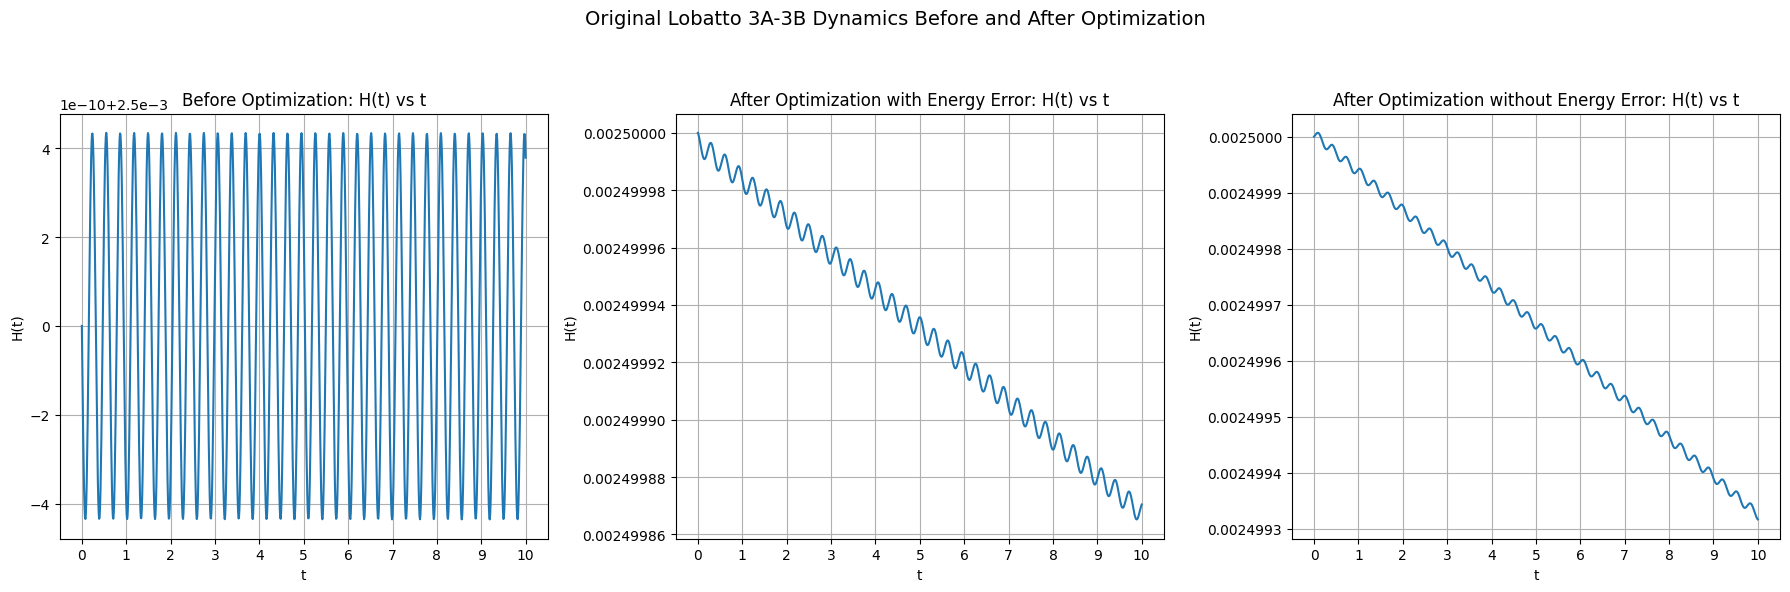

In [24]:
# Initialize the figure with 1 row and 3 columns for the plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Original Lobatto 3A-3B Dynamics Before and After Optimization", fontsize=14)

# Loop over the three conditions (only one row needed)
for col_idx, (title, A1D_data, plots_module) in enumerate(conditions):
    for i, halton_currently_using in enumerate(halton_sequence):
        # Get error, energy, yn_list, zn_list, and H_t from the respective plot module
        Error, Energy, yn_list, zn_list, H_t = plots_module.find_error(A1D_data, halton_currently_using)

        # Create time values corresponding to actual steps (1 time step for every 100 points)
        t = np.linspace(0, actual_steps, len(H_t))

        # Plot zn_list vs H_t (or any other variable as per the context)
        axs[col_idx].plot(t, H_t, label=f"Sample {i+1}")

    # Formatting for each plot
    axs[col_idx].grid(True)
    axs[col_idx].set_xlabel('t')
    axs[col_idx].set_ylabel('H(t)')
    axs[col_idx].set_title(f"{title}: H(t) vs t")
    set_xticks_to_actual_steps(axs[col_idx], actual_steps)  # Adjust x-ticks

# Final adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the super title

plt.show()


# Perturbed Lobatto as initial weights

### ** Dynamics Plot : p(t) - t  and  q(t) - t **

In [8]:
# Data sources for the different conditions
conditions = [
    ("Before Optimization", A1D_Perturbed_BeforeOptimization, WithE_plots),
    ("After Optimization with Energy Error", WithE_final_A1D_Lobatto_Perturbed, WithE_plots),
    ("After Optimization without Energy Error", WithoutE_final_A1D_Lobatto_Perturbed, WithoutE_plots)
]


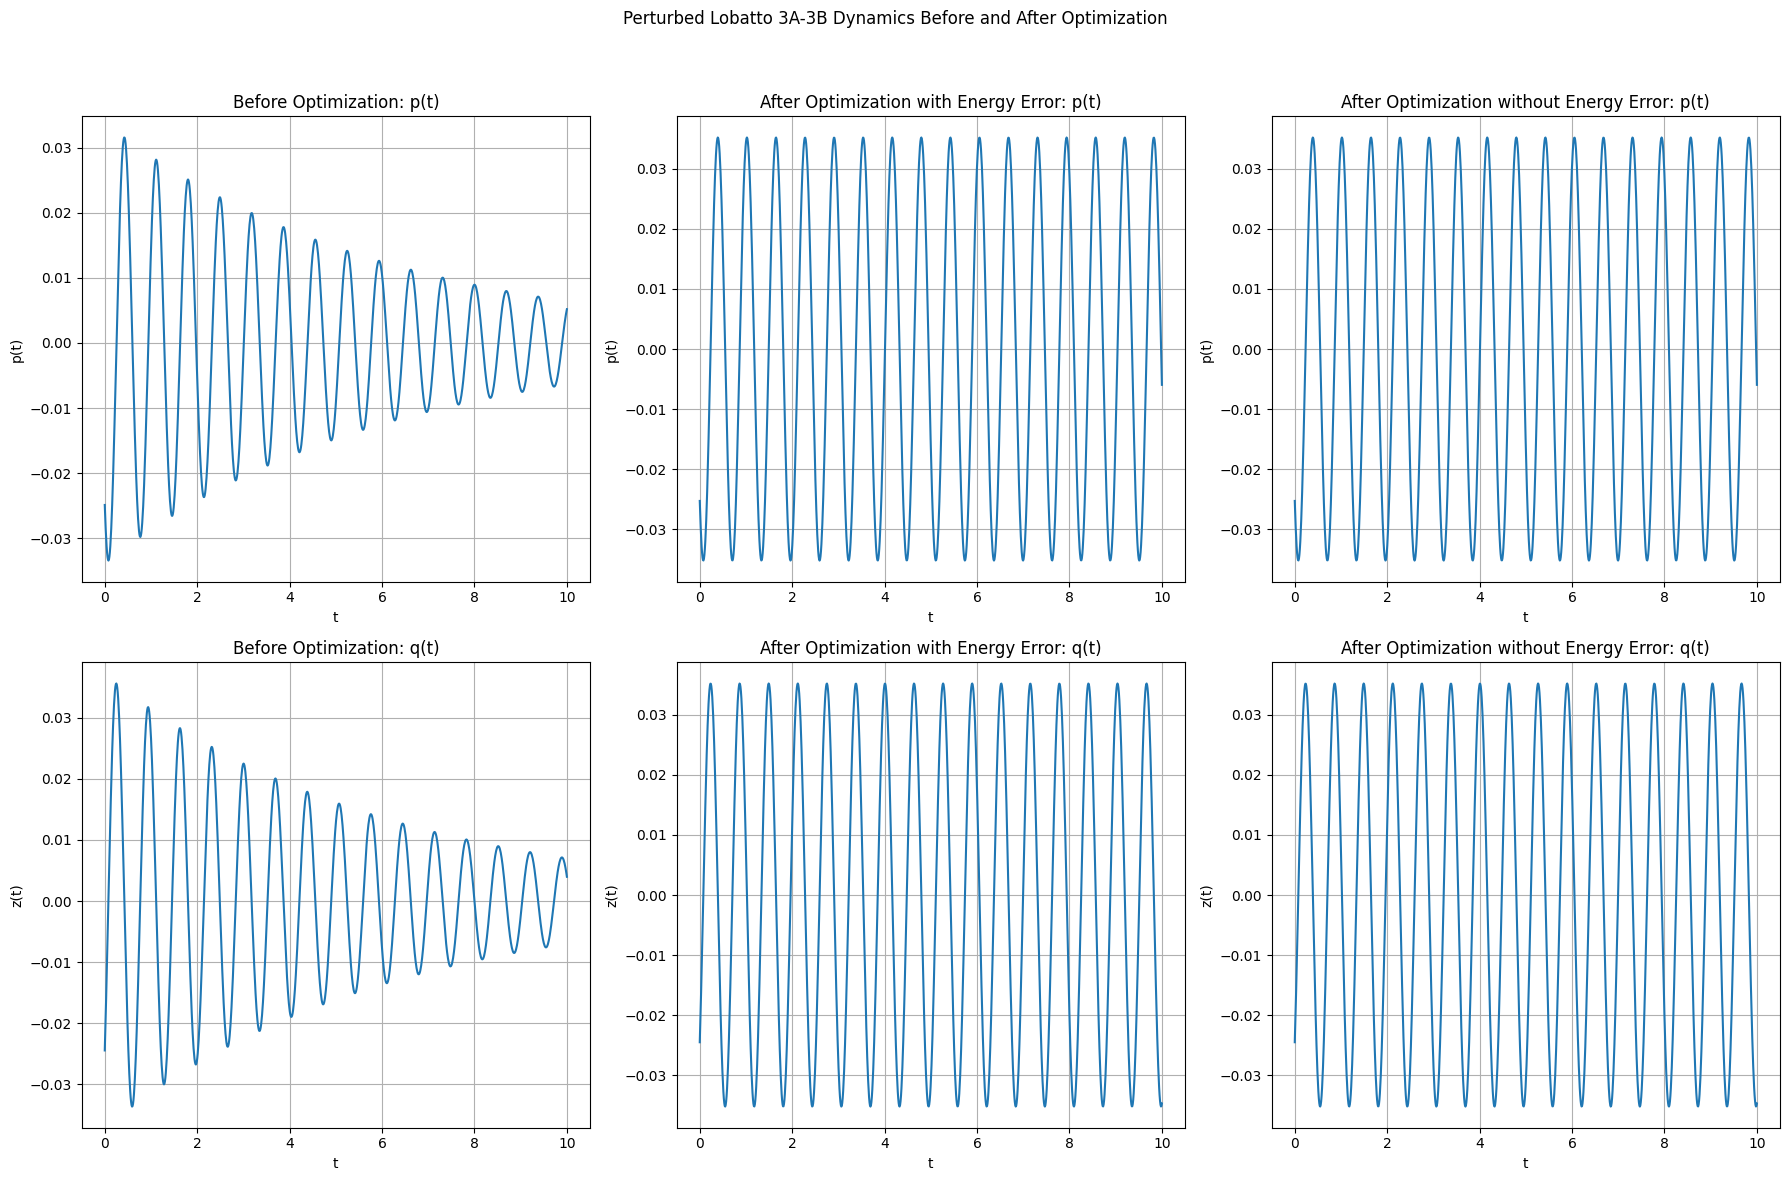

In [9]:
# Initialize the figure with 2 rows and 3 columns for the plots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Perturbed Lobatto 3A-3B Dynamics Before and After Optimization", fontsize=12)

# Loop over the three conditions and the two rows (yn_list and zn_list)
for col_idx, (title, A1D_data, plots_module) in enumerate(conditions):
    for i, halton_currently_using in enumerate(halton_sequence):
        # Get error, energy, yn_list, zn_list, and H_t from the respective plot module
        Error, Energy, yn_list, zn_list, H_t = plots_module.find_error(A1D_data, halton_currently_using)

        # Time array for plotting
        t = np.linspace(0, actual_steps, len(yn_list))
        # Plot p(t) (yn_list) on the first row
        axs[0, col_idx].plot(t, yn_list, label=f"Sample {i+1}")

        t = np.linspace(0, actual_steps, len(zn_list)) 
        # Plot z(t) (zn_list) on the second row
        axs[1, col_idx].plot(t, zn_list, label=f"Sample {i+1}")

    # Formatting for the first row (p(t) plots)
    axs[0, col_idx].grid(True)
    axs[0, col_idx].set_xlabel('t')
    axs[0, col_idx].set_ylabel('p(t)')
    axs[0, col_idx].set_title(f"{title}: p(t)")

    # Formatting for the second row (z(t) plots)
    axs[1, col_idx].grid(True)
    axs[1, col_idx].set_xlabel('t')
    axs[1, col_idx].set_ylabel('z(t)')
    axs[1, col_idx].set_title(f"{title}: q(t)")

# Final adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the super title

plt.show()

### ** Phase Plots : p(t) - q(t) **

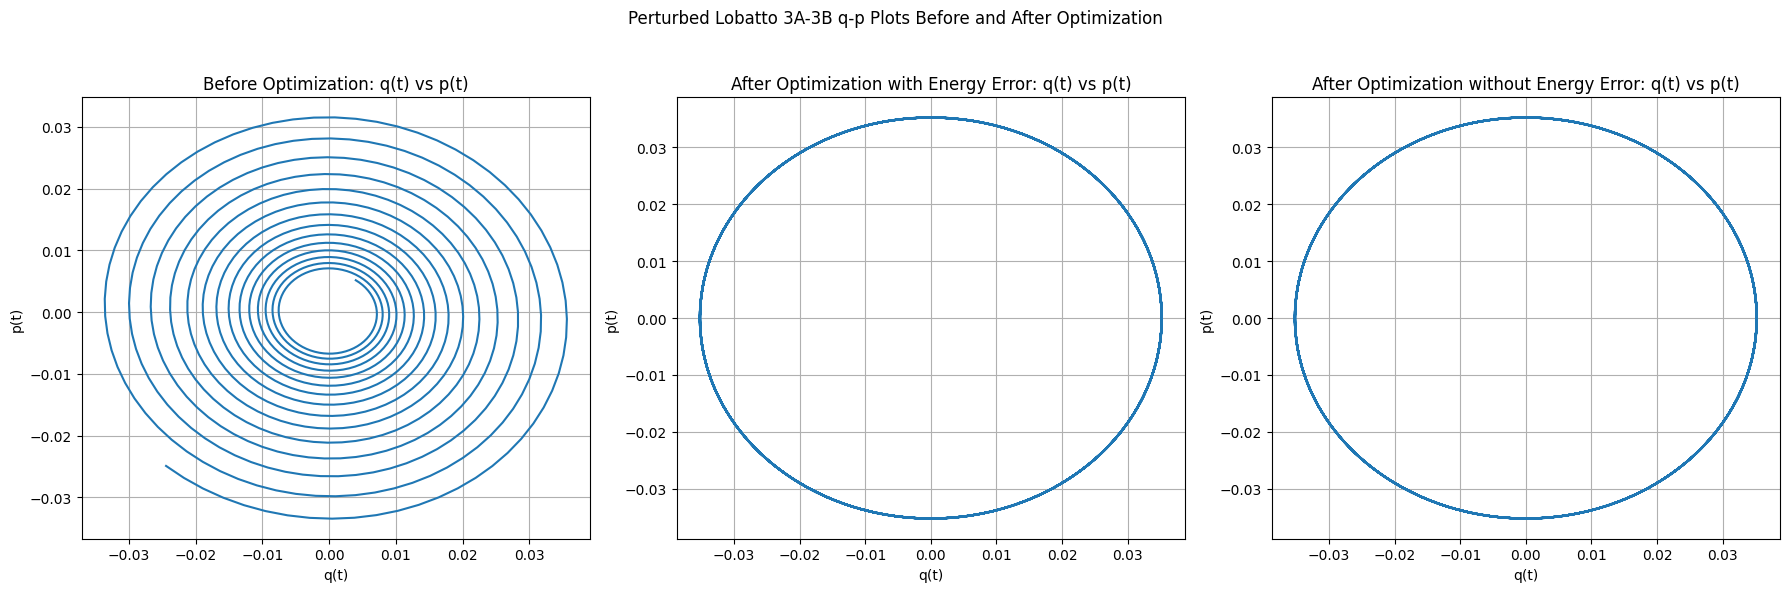

In [10]:
# Initialize the figure with 1 row and 3 columns for the plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Perturbed Lobatto 3A-3B q-p Plots Before and After Optimization", fontsize=12)

# Loop over the three conditions (only one row needed)
for col_idx, (title, A1D_data, plots_module) in enumerate(conditions):
    for i, halton_currently_using in enumerate(halton_sequence):
        # Get error, energy, yn_list, zn_list, and H_t from the respective plot module
        Error, Energy, yn_list, zn_list, H_t = plots_module.find_error(A1D_data, halton_currently_using)

        # Time array for plotting
        t = jnp.arange(1, len(yn_list) + 1, 1)

        # Plot zn_list vs yn_list (as per your new request)
        axs[col_idx].plot(zn_list, yn_list, label=f"Sample {i+1}")

    # Formatting for each plot
    axs[col_idx].grid(True)
    axs[col_idx].set_xlabel('q(t)')
    axs[col_idx].set_ylabel('p(t)')
    axs[col_idx].set_title(f"{title}: q(t) vs p(t)")

# Final adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the super title

plt.show()


### ** Energy Plots : H(t) - t **

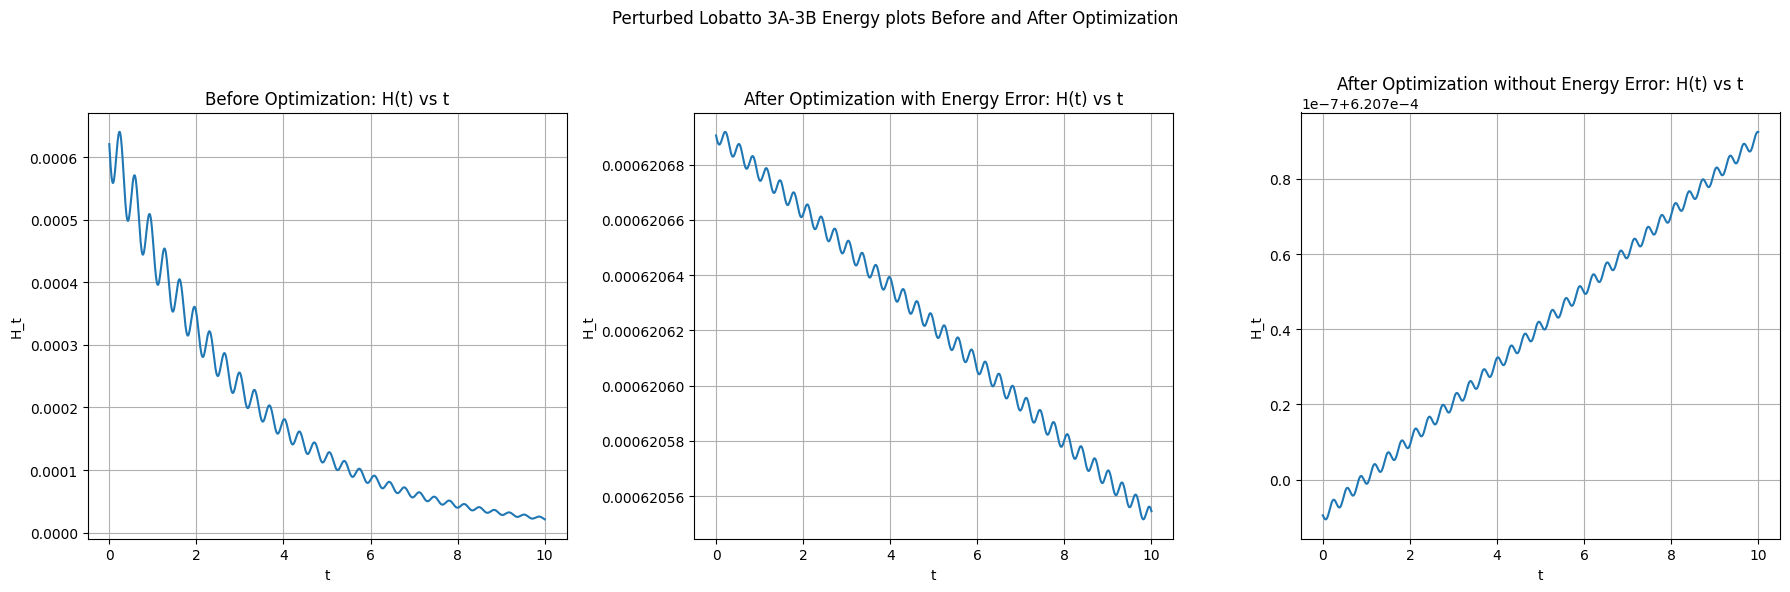

In [11]:
# Initialize the figure with 1 row and 3 columns for the plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Perturbed Lobatto 3A-3B Energy plots Before and After Optimization", fontsize=12)

# Loop over the three conditions (only one row needed)
for col_idx, (title, A1D_data, plots_module) in enumerate(conditions):
    for i, halton_currently_using in enumerate(halton_sequence):
        # Get error, energy, yn_list, zn_list, and H_t from the respective plot module
        Error, Energy, yn_list, zn_list, H_t = plots_module.find_error(A1D_data, halton_currently_using)

        # Time array for plotting
        t = np.linspace(0, actual_steps, len(H_t))

        # Plot zn_list vs yn_list (as per your new request)
        axs[col_idx].plot(t, H_t, label=f"Sample {i+1}")

    # Formatting for each plot
    axs[col_idx].grid(True)
    axs[col_idx].set_xlabel('t')
    axs[col_idx].set_ylabel('H_t')
    axs[col_idx].set_title(f"{title}: H(t) vs t")

# Final adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the super title

plt.show()


==================================================================================================================================================================================================
=

# Checking for RK4 as initial weights

In [176]:
RK4_A1 = jnp.array([
         [0., 0., 0., 0.],
         [1/2, 0., 0, 0.],
         [0., 1/2, 0, 0.],
         [0., 0., 1., 0.]])
RK4_B1 = jnp.array([1/6, 1/3, 1/3, 1/6])

L_A2 = jnp.array([
     [1/6, -1/6, 0., 0.],
     [1/6, 1/3, 0, 0.],
     [1/6, 5/6, 0, 0.],
     [0., 0., 0., 0.]])
L_B2 = jnp.array([1/6, 2/3, 1/6, 0.])

RK4_A1D_original = Convert_toOneD(RK4_A1, L_A2, RK4_B1, L_B2)

"""
######################## Loading the optimized weights ########################
"""

### With Energy
WithE_final_A1D_RK4 = np.loadtxt('With_Energy/One-batch-RK4_Lobatto-Outputs/Final_weights.txt')

### Without Energy
WithoutE_final_A1D_RK4 = np.loadtxt('Without_Energy/One-batch-RK4_Lobatto-Outputs/Final_weights.txt')

In [177]:
# Data sources for the different conditions
conditions = [
    ("Before Optimization", RK4_A1D_original, WithE_plots),
    ("After Optimization with Energy Error", WithE_final_A1D_RK4, WithE_plots),
    ("After Optimization without Energy Error", WithoutE_final_A1D_RK4, WithoutE_plots)
    
]

### ** Dynamics Plot : p(t) - t  and  q(t) - t **

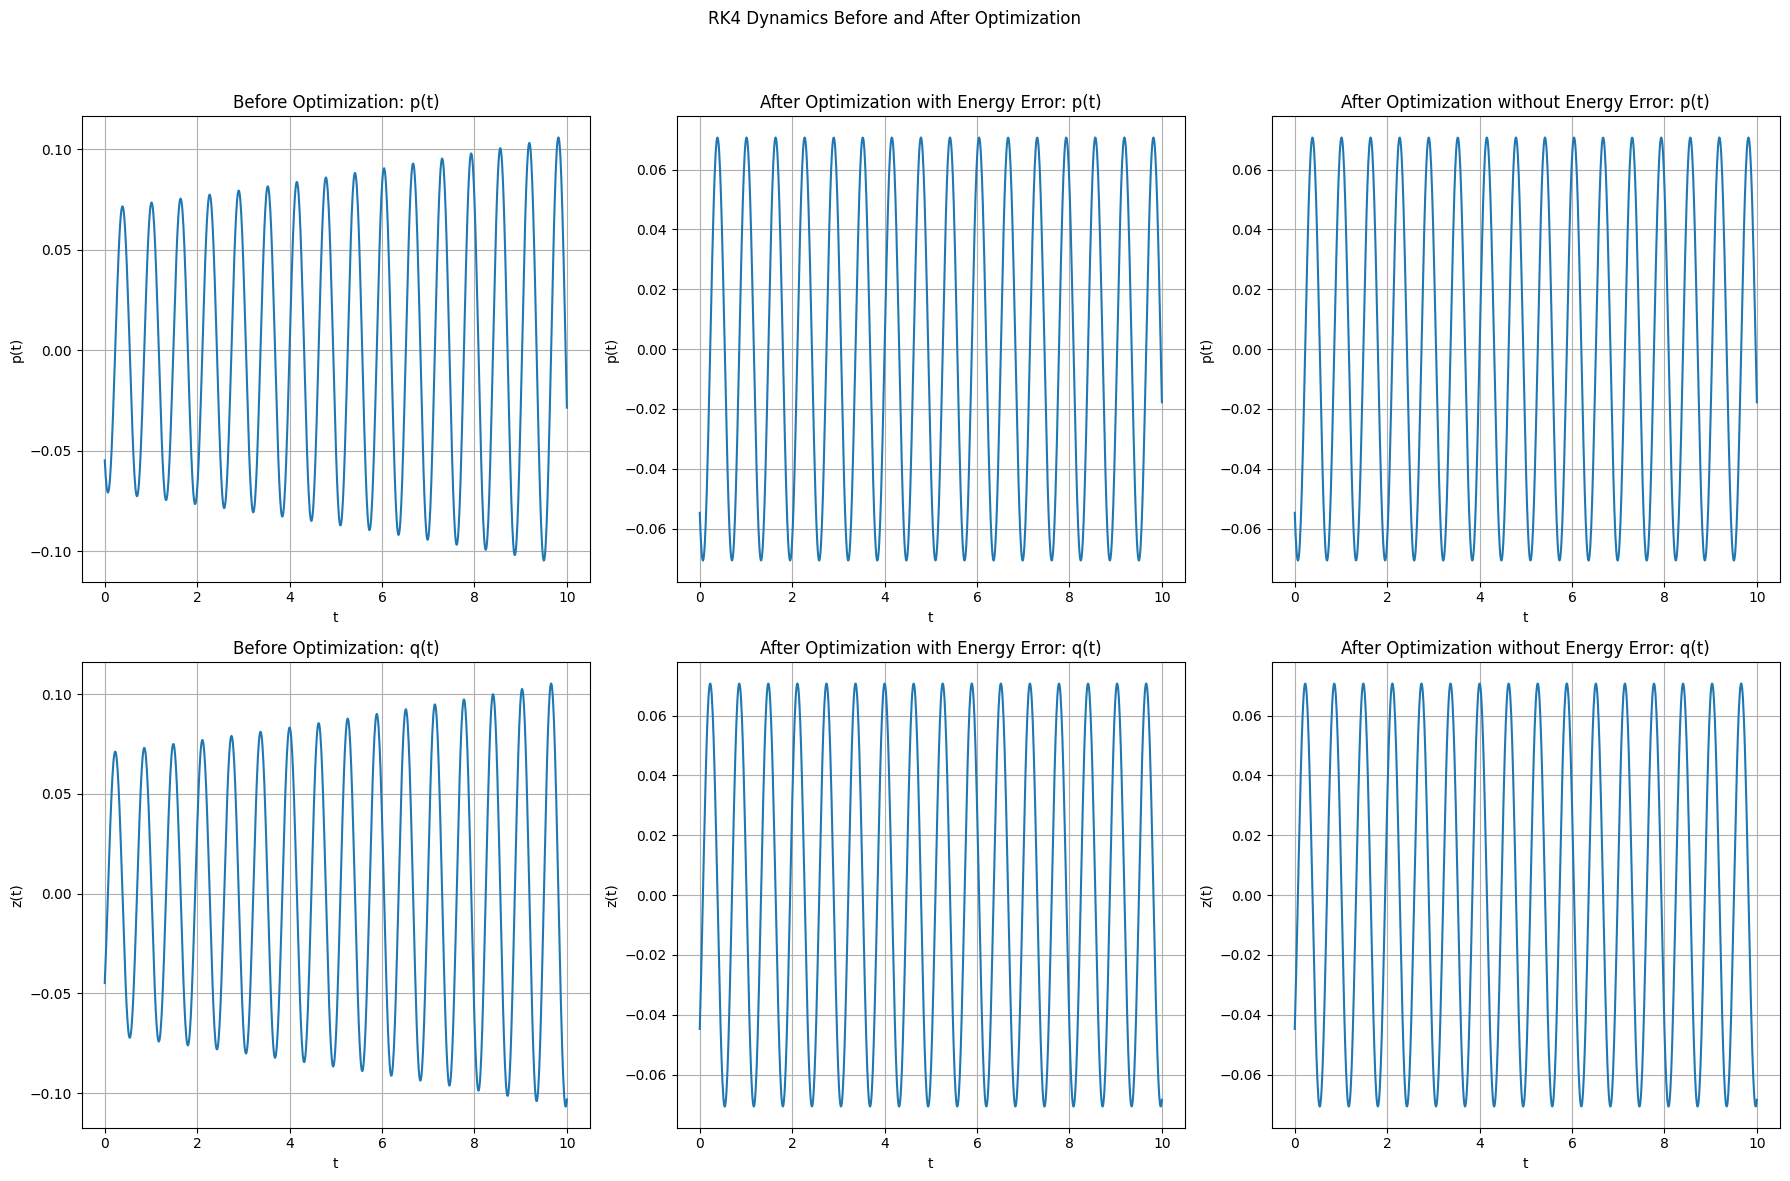

In [178]:
# Initialize the figure with 2 rows and 3 columns for the plots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("RK4 Dynamics Before and After Optimization", fontsize=12)

# Loop over the three conditions and the two rows (yn_list and zn_list)
for col_idx, (title, A1D_data, plots_module) in enumerate(conditions):
    for i, halton_currently_using in enumerate(halton_sequence):
        # Get error, energy, yn_list, zn_list, and H_t from the respective plot module
        Error, Energy, yn_list, zn_list, H_t = plots_module.find_error(A1D_data, halton_currently_using)

        # Time array for plotting
        t = np.linspace(0, actual_steps, len(yn_list)) # len(yn_list) = len(zn_list) so use any

        # Plot p(t) (yn_list) on the first row
        axs[0, col_idx].plot(t, yn_list, label=f"Sample {i+1}")

        # Plot z(t) (zn_list) on the second row
        axs[1, col_idx].plot(t, zn_list, label=f"Sample {i+1}")

    # Formatting for the first row (p(t) plots)
    axs[0, col_idx].grid(True)
    axs[0, col_idx].set_xlabel('t')
    axs[0, col_idx].set_ylabel('p(t)')
    axs[0, col_idx].set_title(f"{title}: p(t)")

    # Formatting for the second row (z(t) plots)
    axs[1, col_idx].grid(True)
    axs[1, col_idx].set_xlabel('t')
    axs[1, col_idx].set_ylabel('z(t)')
    axs[1, col_idx].set_title(f"{title}: q(t)")

# Final adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the super title

plt.show()

### ** Phase Plots : p(t) - q(t) **

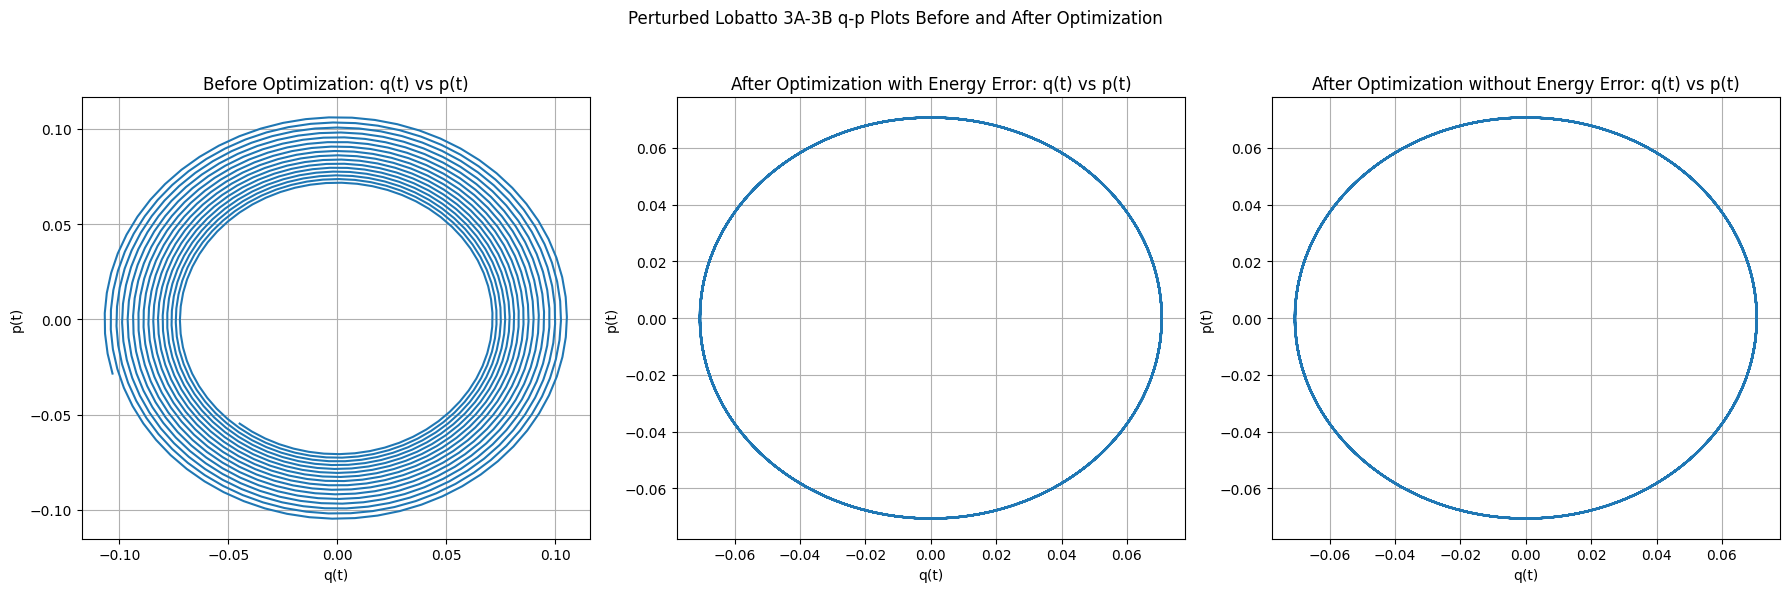

In [179]:
# Initialize the figure with 1 row and 3 columns for the plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Perturbed Lobatto 3A-3B q-p Plots Before and After Optimization", fontsize=12)

# Loop over the three conditions (only one row needed)
for col_idx, (title, A1D_data, plots_module) in enumerate(conditions):
    for i, halton_currently_using in enumerate(halton_sequence):
        # Get error, energy, yn_list, zn_list, and H_t from the respective plot module
        Error, Energy, yn_list, zn_list, H_t = plots_module.find_error(A1D_data, halton_currently_using)

        # Time array for plotting
        t = jnp.arange(1, len(yn_list) + 1, 1)

        # Plot zn_list vs yn_list (as per your new request)
        axs[col_idx].plot(zn_list, yn_list, label=f"Sample {i+1}")

    # Formatting for each plot
    axs[col_idx].grid(True)
    axs[col_idx].set_xlabel('q(t)')
    axs[col_idx].set_ylabel('p(t)')
    axs[col_idx].set_title(f"{title}: q(t) vs p(t)")

# Final adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the super title

plt.show()


### ** Energy Plots : H(t) - t **

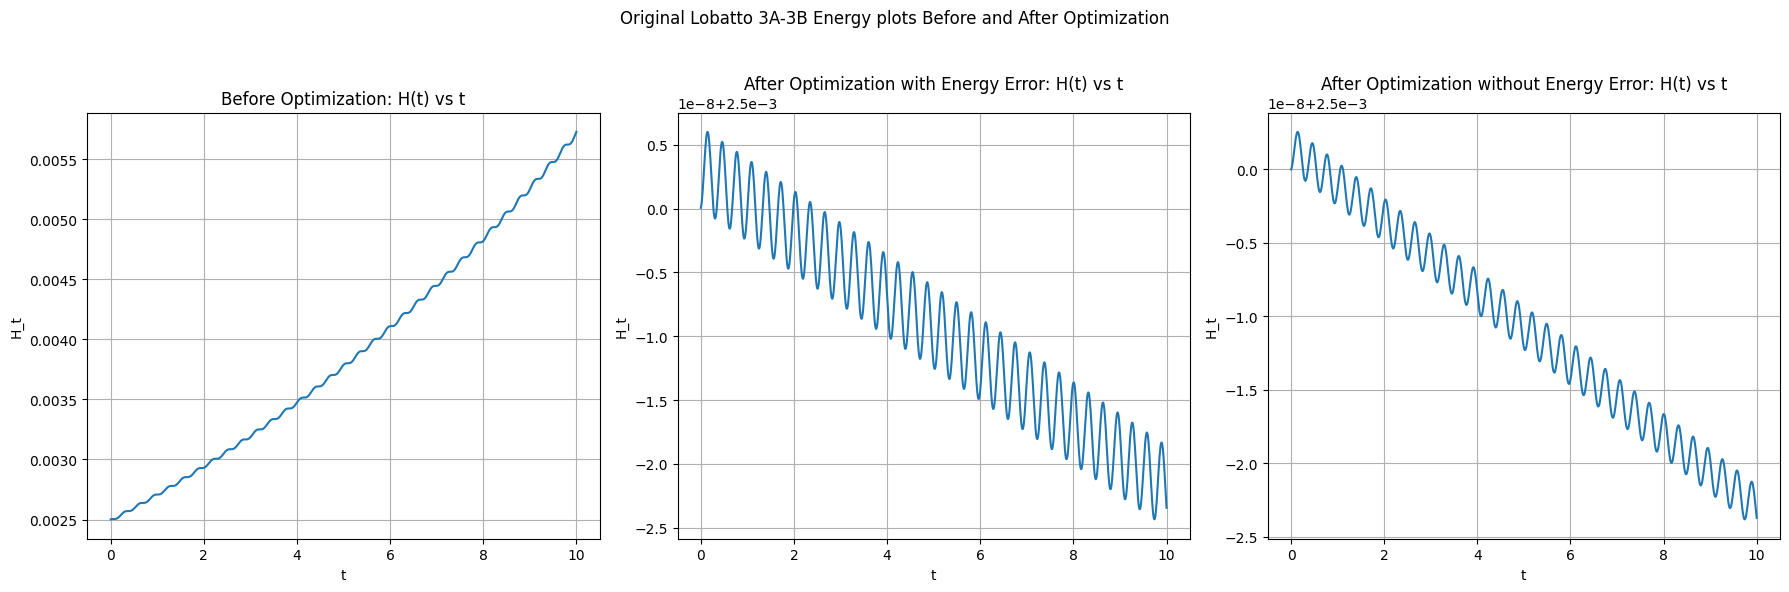

In [180]:
# Initialize the figure with 1 row and 3 columns for the plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Original Lobatto 3A-3B Energy plots Before and After Optimization", fontsize=12)

# Loop over the three conditions (only one row needed)
for col_idx, (title, A1D_data, plots_module) in enumerate(conditions):
    for i, halton_currently_using in enumerate(halton_sequence):
        # Get error, energy, yn_list, zn_list, and H_t from the respective plot module
        Error, Energy, yn_list, zn_list, H_t = plots_module.find_error(A1D_data, halton_currently_using)

        # Time array for plotting
        t = np.linspace(0, actual_steps, len(H_t))

        # Plot zn_list vs yn_list (as per your new request)
        axs[col_idx].plot(t, H_t, label=f"Sample {i+1}")

    # Formatting for each plot
    axs[col_idx].grid(True)
    axs[col_idx].set_xlabel('t')
    axs[col_idx].set_ylabel('H_t')
    axs[col_idx].set_title(f"{title}: H(t) vs t")

# Final adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the super title

plt.show()
